# Importing Libraries

In [151]:
#basic Libraries
import numpy as np
import pandas as pd
import warnings
import scipy

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Libraries set up
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

#Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import RFE as RFE
from sklearn.metrics import r2_score

# 1. Loading the dataset

In [98]:
df = pd.read_csv("spotify_2023_hits.csv", encoding='ISO-8859-1')

#got an error (UnicodeDecodeError: "utf-8") when loading the dataset for the 1st time. 
#The UnicodeDecodeError: ‘utf-8’ codec can’t decode bytes in position 0-1: invalid continuation byte error 
#is a common error that occurs when trying to read a file with Pandas that contains non-UTF-8 encoded characters. 
#UTF-8 is a character encoding standard that’s widely used for text files, but it’s not the only encoding format out there. 
#If you try to read a file with a different encoding format, you may encounter this error.

# 2. Initial exploration

In [99]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Makeba,Jain,1,2015,6,22,6060,53,165484133,150,...,116,D,Major,82,40,66,39,51,25,7
1,Daylight,David Kushner,1,2023,4,14,3528,98,387570742,80,...,130,D,Minor,51,32,43,83,0,9,3
2,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,30546883,80,...,78,NaN,Major,44,14,9,96,0,10,3
3,MONTAGEM - FR PUNK,"Ayparia, unxbected",2,2012,6,20,641,50,58054811,1,...,129,A,Major,63,84,82,70,8,9,7
4,Barbie World (with Aqua) [From Barbie The Album],"Nicki Minaj, Aqua, Ice Spice",3,2023,6,23,1117,80,65156199,82,...,144,NaN,Major,77,75,58,52,0,23,25


In [100]:
df.shape

(952, 24)

In [101]:
df["full_date"] = df["released_day"].map(str) + '-' + df["released_month"].map(str) + '-' + df["released_year"].map(str)
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,full_date
0,Makeba,Jain,1,2015,6,22,6060,53,165484133,150,...,D,Major,82,40,66,39,51,25,7,22-6-2015
1,Daylight,David Kushner,1,2023,4,14,3528,98,387570742,80,...,D,Minor,51,32,43,83,0,9,3,14-4-2023
2,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,30546883,80,...,NaN,Major,44,14,9,96,0,10,3,13-7-2023
3,MONTAGEM - FR PUNK,"Ayparia, unxbected",2,2012,6,20,641,50,58054811,1,...,A,Major,63,84,82,70,8,9,7,20-6-2012
4,Barbie World (with Aqua) [From Barbie The Album],"Nicki Minaj, Aqua, Ice Spice",3,2023,6,23,1117,80,65156199,82,...,NaN,Major,77,75,58,52,0,23,25,23-6-2023


In [102]:
# convert the 'Date' column to datetime format
df["full_date"]= pd.to_datetime(df["full_date"])
 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            952 non-null    object        
 1   artist(s)_name        952 non-null    object        
 2   artist_count          952 non-null    int64         
 3   released_year         952 non-null    int64         
 4   released_month        952 non-null    int64         
 5   released_day          952 non-null    int64         
 6   in_spotify_playlists  952 non-null    int64         
 7   in_spotify_charts     952 non-null    int64         
 8   streams               952 non-null    int64         
 9   in_apple_playlists    952 non-null    int64         
 10  in_apple_charts       952 non-null    int64         
 11  in_deezer_playlists   952 non-null    int64         
 12  in_deezer_charts      952 non-null    int64         
 13  in_shazam_charts    

In [103]:
conditions = [    
    (df["released_month"] > 11) | (df["released_month"] <= 3),
    (df["released_month"] == 4) | (df["released_month"] == 5),
    (df["released_month"] >= 6) | (df["released_month"] <= 9),
    (df["released_month"] == 10) | (df["released_month"] == 11)
]

# create a list of the values we want to assign for each condition
values = ['Winter', 'Spring', 'Summer', 'Fall']
    
# create a new column and use np.select to assign values to it using our lists as arguments
df['released_season'] = np.select(conditions, values)

In [27]:
df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,full_date,released_season
0,Makeba,Jain,1,2015,6,22,6060,53,165484133,150,...,Major,82,40,66,39,51,25,7,2015-06-22,Summer
1,Daylight,David Kushner,1,2023,4,14,3528,98,387570742,80,...,Minor,51,32,43,83,0,9,3,2023-04-14,Spring
2,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,30546883,80,...,Major,44,14,9,96,0,10,3,2023-07-13,Summer
3,MONTAGEM - FR PUNK,"Ayparia, unxbected",2,2012,6,20,641,50,58054811,1,...,Major,63,84,82,70,8,9,7,2012-06-20,Summer
4,Barbie World (with Aqua) [From Barbie The Album],"Nicki Minaj, Aqua, Ice Spice",3,2023,6,23,1117,80,65156199,82,...,Major,77,75,58,52,0,23,25,2023-06-23,Summer
5,Popular (with Playboi Carti & Madonna) - The I...,"The Weeknd, Madonna, Playboi Carti",3,2023,6,2,1945,87,115364561,74,...,Major,85,83,68,7,0,36,20,2023-06-02,Summer
6,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,...,Major,71,65,68,6,0,3,7,2023-01-12,Winter
7,The Next Episode,"Dr. Dre, Snoop Dogg",2,1999,1,1,31762,0,843309044,142,...,Minor,92,31,89,3,0,8,25,1999-01-01,Winter
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,Minor,85,22,62,12,0,28,9,2023-05-15,Spring
9,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,Major,51,32,53,17,0,31,6,2023-06-30,Summer


In [104]:
 
# Display the modified DataFrame
df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,full_date,released_season
0,Makeba,Jain,1,2015,6,22,6060,53,165484133,150,...,Major,82,40,66,39,51,25,7,2015-06-22,Summer
1,Daylight,David Kushner,1,2023,4,14,3528,98,387570742,80,...,Minor,51,32,43,83,0,9,3,2023-04-14,Spring
2,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,30546883,80,...,Major,44,14,9,96,0,10,3,2023-07-13,Summer
3,MONTAGEM - FR PUNK,"Ayparia, unxbected",2,2012,6,20,641,50,58054811,1,...,Major,63,84,82,70,8,9,7,2012-06-20,Summer
4,Barbie World (with Aqua) [From Barbie The Album],"Nicki Minaj, Aqua, Ice Spice",3,2023,6,23,1117,80,65156199,82,...,Major,77,75,58,52,0,23,25,2023-06-23,Summer
5,Popular (with Playboi Carti & Madonna) - The I...,"The Weeknd, Madonna, Playboi Carti",3,2023,6,2,1945,87,115364561,74,...,Major,85,83,68,7,0,36,20,2023-06-02,Summer
6,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,...,Major,71,65,68,6,0,3,7,2023-01-12,Winter
7,The Next Episode,"Dr. Dre, Snoop Dogg",2,1999,1,1,31762,0,843309044,142,...,Minor,92,31,89,3,0,8,25,1999-01-01,Winter
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,Minor,85,22,62,12,0,28,9,2023-05-15,Spring
9,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,Major,51,32,53,17,0,31,6,2023-06-30,Summer


In [114]:
#Getting frequency of each artist 
artists_df = df[['artist(s)_name']].copy()


In [89]:
artists_df.head()

,artist(s)_name
0,Jain
1,David Kushner
2,Billie Eilish
3,"Ayparia, unxbected"
4,"Nicki Minaj, Aqua, Ice Spice"


In [106]:
artists_df.shape

(952, 1)

In [115]:
artists_df["artist(s)_name"] = artists_df["artist(s)_name"].str.split(",")
art_freq_df = artists_df.explode("artist(s)_name").copy()

In [108]:
art_freq_df.head(20)

,artist(s)_name
0,Jain
1,David Kushner
2,Billie Eilish
3,Ayparia
3,unxbected
4,Nicki Minaj
4,Aqua
4,Ice Spice
5,The Weeknd
5,Madonna


In [92]:
art_freq_df.shape

(1481, 1)

In [120]:
# counting unique values
#art_freq_df({'count' : art_freq_df.groupby(["artist(s)_name"]).size()}).reset_index()

a_f_list = art_freq_df.groupby("artist(s)_name").size().sort_values(ascending=False)
 

In [121]:
a_f_df = pd.DataFrame(a_f_list) 

In [122]:
a_f_df.head(10)

,0
artist(s)_name,
Taylor Swift,36
The Weeknd,34
Bad Bunny,26
SZA,23
Kendrick Lamar,23
Drake,19
Harry Styles,17
Feid,15
Bad Bunny,14


In [123]:
a_f_df.to_csv("artist_frequency.csv")

In [105]:
# top 20 songs by streams 
top_20_songs_by_streams = df.filter(items = ['track_name','streams'], axis = 1)

# sorting the values by stream in decsending order
top_20_songs_by_streams = top_20_songs_by_streams.sort_values(by = 'streams',ascending = False).head(20)

top_20_songs_by_streams

,track_name,streams
902,Blinding Lights,3703895074
559,Shape of You,3562543890
903,Someone You Loved,2887241814
904,Dance Monkey,2864791672
163,Sunflower - Spider-Man: Into the Spider-Verse,2808096550
269,One Dance,2713922350
560,STAY (with Justin Bieber),2665343922
246,Believer,2594040133
210,Closer,2591224264
110,Starboy,2565529693


In [106]:
# Ploting the data 
import plotly.express as px

top_20_songs_by_streams_v = px.bar(top_20_songs_by_streams,y= 'track_name', x = 'streams',template = 'plotly_white',width = 1200, height = 700,color = 'streams',
                                 title = 'Top 20 Songs By Number Of Streams' , labels = {'track_name' : 'Songs Name', 'streams' : 'Streams'})
top_20_songs_by_streams_v

In [107]:
# top 20 artist by number of streams 
top_20_artist_by_streams = df.filter(items = ['artist(s)_name','streams'], axis = 1)
# sorting and sum the number of streams 
top_20_artist_by_streams =top_20_artist_by_streams.groupby(['artist(s)_name'])['streams'].sum().sort_values(ascending =False).to_frame().head(20)
top_20_artist_by_streams.reset_index(inplace = True)
top_20_artist_by_streams

,artist(s)_name,streams
0,The Weeknd,14185552870
1,Taylor Swift,14053658300
2,Ed Sheeran,13908947204
3,Harry Styles,11608645649
4,Bad Bunny,9997799607
5,Olivia Rodrigo,7442148916
6,Eminem,6183805596
7,Bruno Mars,5846920599
8,Arctic Monkeys,5569806731
9,Imagine Dragons,5272484650


In [108]:
# Ploting top 20 atist by number of streams 
top_20_artist_by_streams_v = px.bar(top_20_artist_by_streams,y= 'artist(s)_name', x = 'streams',template = 'simple_white',width = 1200, height = 700,
                                    color = 'streams',title = 'Top 20 Artists By Number of Streams',labels = {'artist(s)_name': 'Artist Name',
                                        'streams': 'Number Of Streams'})
top_20_artist_by_streams_v

# 3. Data cleaning and imputation

In [124]:
#Dropping columns not needed for this analysis

df.drop(["track_name", "artist(s)_name", "released_year", "released_month", "released_day", "full_date"], axis=1, inplace=True)

In [110]:
df.shape

(952, 19)

In [125]:
# Checking for null values, we found some missing values in 2 columns.
#"in_shazam_charts" has 50/952 = 5% missing values and "key" has 10% missing values.
df.isnull().sum()

artist_count             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
released_season          0
dtype: int64

In [126]:
#Handling missing values
#We can fill "in_shazam_charts" column with the AVG of in_spotify_charts, in_apple_charts and in_deezer_charts

mean_charts = sum(df[["in_spotify_charts", "in_apple_charts", "in_deezer_charts"]].mean())/3
print(mean_charts)

# fill NaN values with the mean of each column
df["in_shazam_charts"].fillna(mean_charts, inplace=True)

#We decide to drop the key column
df.drop("key", axis=1, inplace=True)

df.info()


22.21813725490196
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   artist_count          952 non-null    int64  
 1   in_spotify_playlists  952 non-null    int64  
 2   in_spotify_charts     952 non-null    int64  
 3   streams               952 non-null    int64  
 4   in_apple_playlists    952 non-null    int64  
 5   in_apple_charts       952 non-null    int64  
 6   in_deezer_playlists   952 non-null    int64  
 7   in_deezer_charts      952 non-null    int64  
 8   in_shazam_charts      952 non-null    float64
 9   bpm                   952 non-null    int64  
 10  mode                  952 non-null    object 
 11  danceability_%        952 non-null    int64  
 12  valence_%             952 non-null    int64  
 13  energy_%              952 non-null    int64  
 14  acousticness_%        952 non-null    int64  
 15  instr

In [113]:
df.isnull().sum()

artist_count            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [127]:
df.shape

(952, 19)

In [115]:
# Check for duplicates
df.duplicated().sum()

0

# 4. Relationships in data

In [128]:
# Get summary statistics of the numerical data
df.describe()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,385.535714,2.669118,58.074482,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,1131.078760,6.038152,157.169354,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,13.000000,0.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,44.000000,0.000000,4.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,164.250000,2.000000,33.250000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,58.000000,1451.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


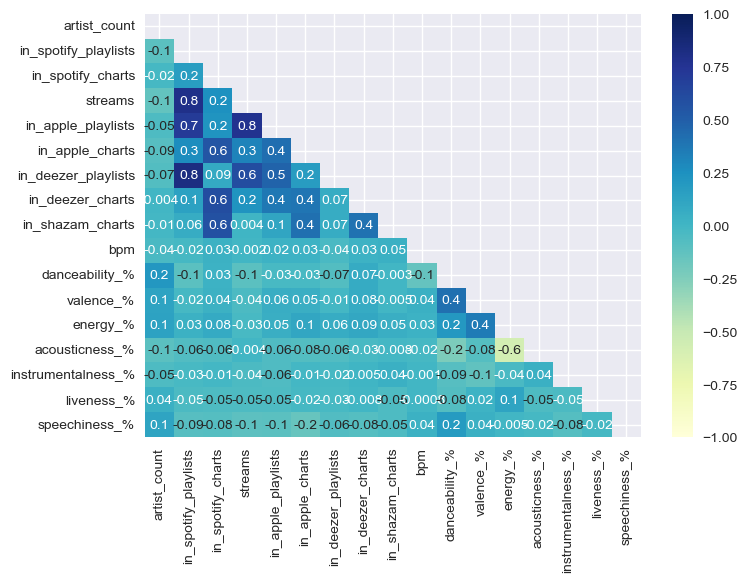

In [129]:
#Looking at correlation between variables

# creating mask to hide redundant information
mask = np.triu(np.ones_like(df.corr(numeric_only=True)))
  
# plotting correlation heatmap 
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True, fmt='.1g', mask=mask, vmin = -1, vmax = 1)

plt.show();

In [118]:
print(df.corr(numeric_only=True)["streams"])


artist_count           -0.136463
in_spotify_playlists    0.789822
in_spotify_charts       0.245821
streams                 1.000000
in_apple_playlists      0.772063
in_apple_charts         0.320234
in_deezer_playlists     0.598131
in_deezer_charts        0.228598
in_shazam_charts        0.004174
bpm                    -0.002438
danceability_%         -0.105457
valence_%              -0.040831
energy_%               -0.026051
acousticness_%         -0.004485
instrumentalness_%     -0.044902
liveness_%             -0.048337
speechiness_%          -0.112333
Name: streams, dtype: float64


In [119]:
print(df.corr(numeric_only=True)["in_spotify_playlists"])

artist_count           -0.102184
in_spotify_playlists    1.000000
in_spotify_charts       0.164182
streams                 0.789822
in_apple_playlists      0.708258
in_apple_charts         0.271162
in_deezer_playlists     0.826388
in_deezer_charts        0.144227
in_shazam_charts        0.064368
bpm                    -0.019739
danceability_%         -0.106885
valence_%              -0.021585
energy_%                0.033899
acousticness_%         -0.064683
instrumentalness_%     -0.028194
liveness_%             -0.046725
speechiness_%          -0.089973
Name: in_spotify_playlists, dtype: float64


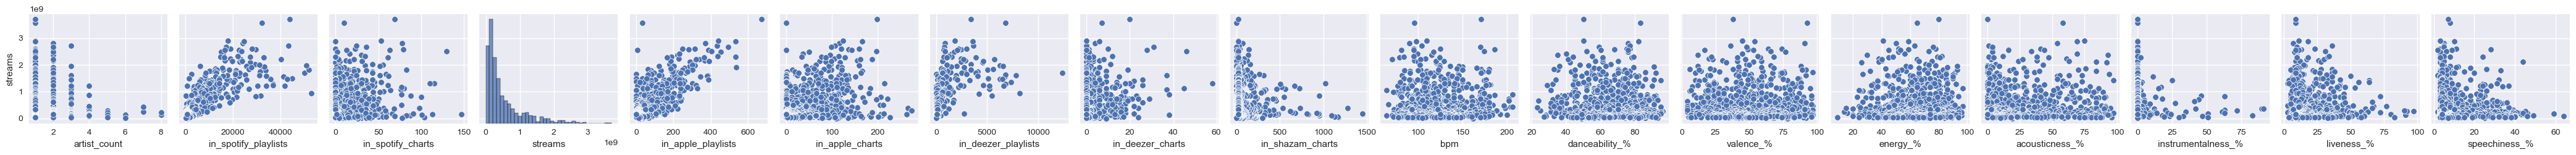

In [120]:
sns.pairplot(data = df, y_vars = 'streams')  
plt.show();

## Handling outliers

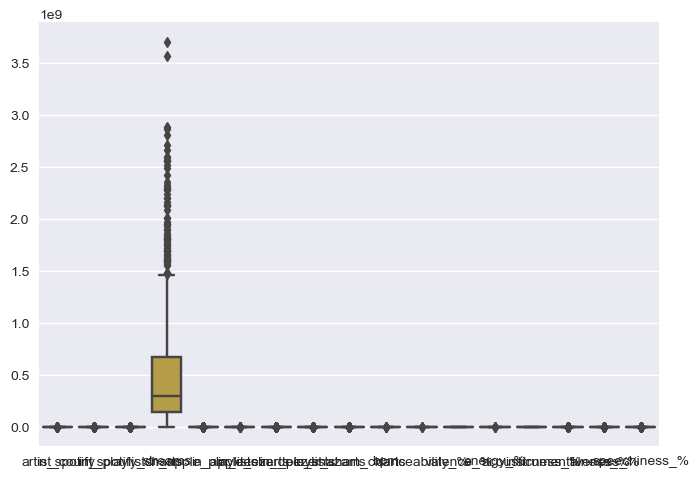

In [121]:
#We have a look to the distribution of our data to see if it is skwee (which means outliers are present)

sns.boxplot(df)
plt.show()

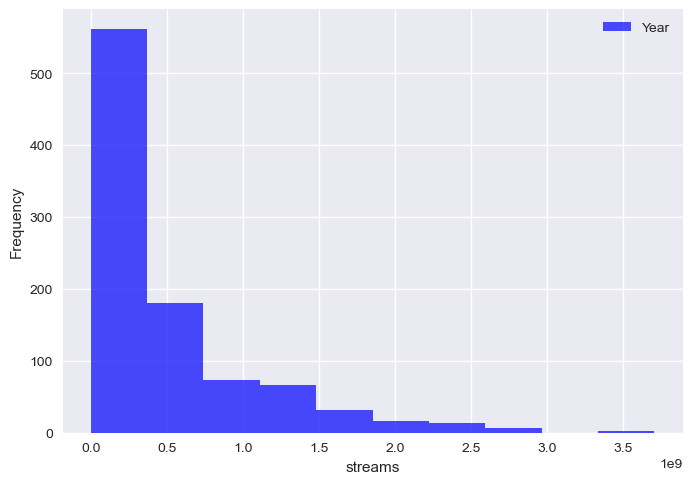

In [122]:
#Our target variable is positively (right) skweed
plt.hist(df['streams'], bins=10, color='blue', alpha=0.7, label='Year')
plt.xlabel('streams')
plt.ylabel('Frequency')
plt.legend()
plt.show();

<Axes: xlabel='streams', ylabel='Count'>

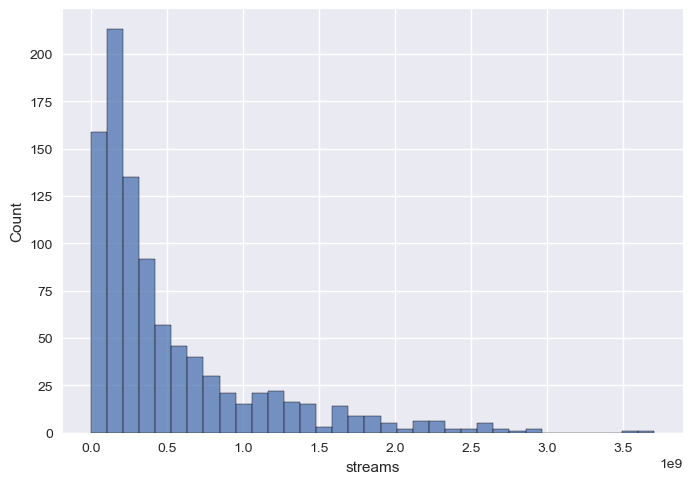

In [123]:
sns.histplot(df['streams'])

One common approach used for outlier detection is the Interquartile Range (IQR) which gives us an idea of how spread out the values in the middle of our data set are. 

This method works by sorting your dataset from the smallest to the largest values, then dividing in into four equal parts (called the quartiles). This leaves you with three points:
- **Q1 (first quartile)** - The 25th percentile. 25 percent of the data falls below this point.
- **Q2 (second quartile)** - The median. 50 percent of the data falls below and above this point.
- **Q2 (second quartile)** - The 75th percentile. 75 percent of the data falls below this point.

Using these points, you calculate the **Interquartile Range (IQR)** which is the range between the first and third quartiles

In [124]:
# Find the 75th and 25th percentiles
stream_seventy_fifth = df["streams"].quantile(0.75)
stream_twenty_fifth = df["streams"].quantile(0.25)

# Calculate iqr
streams_iqr = stream_seventy_fifth - stream_twenty_fifth

# Calculate the thresholds
upper = stream_seventy_fifth + (1.5 * streams_iqr)
lower = stream_twenty_fifth - (1.5 * streams_iqr)

# Subset the data
df1 = df[(df["streams"] > lower) & (df["streams"] < upper)]



In [125]:
df1.describe()


,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,878.000000,878.000000,878.000000,8.780000e+02,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1.578588,3709.158314,11.146925,3.864873e+08,52.382688,49.150342,197.282460,2.498861,59.310021,122.677677,67.328018,51.403189,64.292711,27.037585,1.701595,18.395216,10.361048
std,0.913648,5325.048172,18.708715,3.469503e+08,58.081386,49.295818,702.389481,5.730303,162.677369,28.094193,14.607816,23.492381,16.488888,25.759872,8.743515,13.963050,10.068553
min,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,824.750000,0.000000,1.344907e+08,12.000000,6.000000,12.000000,0.000000,0.000000,99.000000,58.000000,32.000000,54.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,1940.500000,2.000000,2.599158e+08,29.500000,33.500000,37.500000,0.000000,3.000000,121.000000,70.000000,52.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,4437.750000,15.000000,5.366705e+08,73.000000,82.000000,114.000000,2.000000,33.000000,140.750000,79.000000,70.000000,77.000000,42.000000,0.000000,24.000000,12.000000
max,8.000000,52898.000000,147.000000,1.457139e+09,387.000000,275.000000,8215.000000,58.000000,1451.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


<Axes: xlabel='streams', ylabel='Count'>

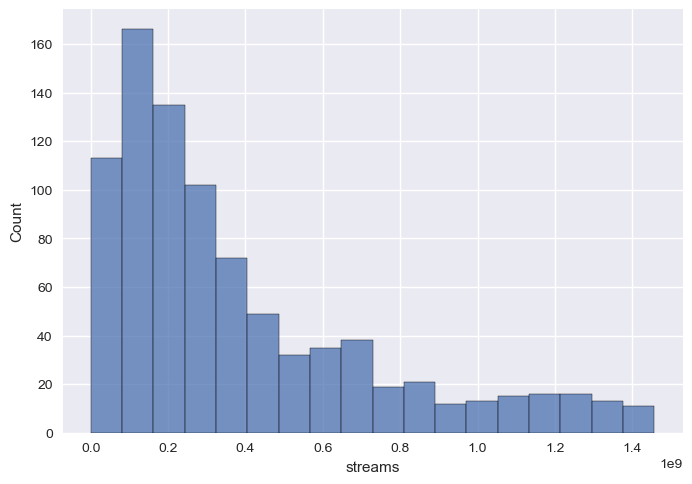

In [126]:
sns.histplot(df1['streams'])

In [127]:
#df1 is the dataset that not contains outliers in our target variable, but another option is standardizing numerical variables so extreme values do not affect our model.

# 5. Other considerations
 
## Encoding categorical variables, standarizing numerical data...

In [130]:
#Scale Numerical Data with StandardScaler()

from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_z = df.copy()

scaler = StandardScaler()
num_cols = df_z.select_dtypes(include=np.number).columns

df_z[num_cols] = scaler.fit_transform(df[num_cols])

df_z.head()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_season
0,-0.623526,0.108574,2.093690,-0.615387,0.950341,1.897875,2.049974,3.203140,8.867235,-0.233598,Major,1.026817,-0.486041,0.104282,0.458721,5.876232,0.494904,-0.316710,Summer
1,-0.623526,-0.212044,4.392879,-0.223395,0.140392,2.055971,-0.180043,3.534541,7.785031,0.265424,Minor,-1.093045,-0.826928,-1.285462,2.151814,-0.188234,-0.672028,-0.720335,Spring
2,-0.623526,-0.548237,4.699437,-0.853557,0.140392,3.459071,-0.257001,3.534541,7.097513,-1.588088,Major,-1.571723,-1.593924,-3.339865,2.652046,-0.188234,-0.599095,-0.720335,Summer
3,0.496468,-0.577614,1.940410,-0.805004,-0.773694,0.000727,-0.333959,-0.442275,7.078415,0.229779,Major,-0.272453,1.388837,1.071060,1.651582,0.763055,-0.672028,-0.316710,Summer
4,1.616462,-0.517340,3.473203,-0.792470,0.163533,1.838589,-0.283538,2.208936,6.842877,0.764446,Major,0.684904,1.005339,-0.379107,0.958953,-0.188234,0.349038,1.499602,Summer


In [131]:
#Encoding categorical variables. In this case, only "mode" needs this transformation

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

cat_cols = ["mode", "released_season"]

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_z[cat_cols]))
df_encoded.columns = encoder.get_feature_names_out(cat_cols)

# Replace Categotical Data with Encoded Data
df_z = df_z.drop(cat_cols ,axis=1)
df_z = pd.concat([df_encoded, df_z], axis=1)

print('Shape of dataframe:', df_z.shape)
df_z.head()



Shape of dataframe: (952, 22)


,mode_Major,mode_Minor,released_season_Spring,released_season_Summer,released_season_Winter,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,1.0,0.0,0.0,1.0,0.0,-0.623526,0.108574,2.093690,-0.615387,0.950341,...,3.203140,8.867235,-0.233598,1.026817,-0.486041,0.104282,0.458721,5.876232,0.494904,-0.316710
1,0.0,1.0,1.0,0.0,0.0,-0.623526,-0.212044,4.392879,-0.223395,0.140392,...,3.534541,7.785031,0.265424,-1.093045,-0.826928,-1.285462,2.151814,-0.188234,-0.672028,-0.720335
2,1.0,0.0,0.0,1.0,0.0,-0.623526,-0.548237,4.699437,-0.853557,0.140392,...,3.534541,7.097513,-1.588088,-1.571723,-1.593924,-3.339865,2.652046,-0.188234,-0.599095,-0.720335
3,1.0,0.0,0.0,1.0,0.0,0.496468,-0.577614,1.940410,-0.805004,-0.773694,...,-0.442275,7.078415,0.229779,-0.272453,1.388837,1.071060,1.651582,0.763055,-0.672028,-0.316710
4,1.0,0.0,0.0,1.0,0.0,1.616462,-0.517340,3.473203,-0.792470,0.163533,...,2.208936,6.842877,0.764446,0.684904,1.005339,-0.379107,0.958953,-0.188234,0.349038,1.499602


# Machine Learning Model

##  Specifying Feature and Target variables for our model and spliting the sample into training and testing sets

In [133]:


# Select Features
X = df_z.drop('streams', axis=1)

# Select Target
y = df_z['streams']

# Set Training and Testing Data

X_train, X_test, y_train, y_test = train_test_split(X , y, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (761, 21)
Shape of testing feature: (191, 21)
Shape of training label: (761,)
Shape of testing label: (191,)


## 1. Linear Regression Model 

Fitting the model. **The best-fitting line** minimises the difference between the predicted values and the actual values in the data

In [134]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Interpret the model

In [135]:
#Interpreting the model
lm.intercept_

0.006949195917840809

In [167]:
# Get a table of your feature variable names and their associated coefficients (if multiple)
feature_df = pd.DataFrame(lm.coef_, index=X_train.columns)
feature_df.sort_values(by= 0, ascending= False)

,0
in_apple_playlists,0.442245
in_spotify_playlists,0.424506
in_spotify_charts,0.211580
in_deezer_playlists,0.029927
mode_Minor,0.027986
acousticness_%,0.025952
released_season_Summer,0.016161
liveness_%,0.010365
released_season_Spring,0.010358
speechiness_%,-0.000376


In [134]:
#We can observe that "in_apple_playlists" and "in_spotify_playlists" explain most of the target variability, followed by "in_spotify_charts", "in_shazam_charts" (negative) and "artist_count"(negative). So a good number of 
#features for this model could be 4 or 5

Model Evaluation

**R-squared** (a _coefficient of determination_) is a value between 0 and 1, and is a measure of goodness of fit, representing the proportion of the variance in the target explained by your feature variables. 

If the R-squared value is **_0_**, it means that **none of the variability** in the target variable is explained by the feature variables.

If the R-squared value is **_1_**, it means that **all of the variability** in the target variable is explained by the feature variables

In [137]:
# Checking the overall model perfomance on the entire dataset
lm.score(X, y)

#75% of the variation in the target variable can be explained by the feature variables

0.7488047281193096

In [136]:
#Evaluating Training and Testing sets R-square to check if our model could be over/underfitted

In [138]:
print(f'Training score: {lm.score(X_train, y_train):.2f}')
print(f'Testing score: {lm.score(X_test, y_test):.2f}')

Training score: 0.75
Testing score: 0.73


Evaluation of our model with different metrics:

We can use **Root Mean Squared Error (RMSE)** and/or **Mean Absolute Error (MAE)** in addition to R-squared.

RMSE gives the average magnitude of the errors in the model's prediction. The lower the RMSE, the better predictive accuracy. This metric can produce larger errors if you have outliers and so the larger errors might have a bigger impact on the overall performance of the model. This might be useful if you want to emphasise errors and want to improve the accuracy of the predictions. 

MAE gives the average absolute difference between the predicted and actual values. The lower the MAE, the better the predictive accuracy of your model. Robust to outliers and so might be a preferred metric if you have extreme values in your data set.

In [139]:
# Let's predict the target values of our testing set
test_predictions = lm.predict(X_test)

In [140]:
# Calculate the root mean squared error using the testing data and the predictions
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f'RMSE: {rmse:.2f}')

RMSE: 0.46


In [141]:
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, test_predictions)

# Print the errors using f-strings and 3 decimal places
print(f'MAE: {mae:.2f}')

MAE: 0.33


Cross-validation

We will combine the k-Fold Cross Validation method in making our Linear Regression model, to improve the generalizability of our model, as well as to avoid overfitting in our predictions

In [142]:
from sklearn.model_selection import cross_val_score, KFold

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores

array([0.82430044, 0.65135098, 0.65514302, 0.76102047, 0.71689502])

In [143]:
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-0.19537431, -0.39023822, -0.29097149, -0.23723501, -0.28888596])

Using RFE:
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features

In [144]:
len(X_train.columns)

21

In [148]:
# running RFE with number of features=10

lm1 = LinearRegression()
lm1.fit(X_train, y_train)

rfe = RFE(lm1, n_features_to_select=5)             
rfe = rfe.fit(X_train, y_train)

In [149]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('mode_Major', False, 9),
 ('mode_Minor', False, 4),
 ('released_season_Spring', False, 15),
 ('released_season_Summer', False, 14),
 ('released_season_Winter', False, 6),
 ('artist_count', True, 1),
 ('in_spotify_playlists', True, 1),
 ('in_spotify_charts', True, 1),
 ('in_apple_playlists', True, 1),
 ('in_apple_charts', False, 10),
 ('in_deezer_playlists', False, 8),
 ('in_deezer_charts', False, 5),
 ('in_shazam_charts', True, 1),
 ('bpm', False, 16),
 ('danceability_%', False, 11),
 ('valence_%', False, 2),
 ('energy_%', False, 7),
 ('acousticness_%', False, 3),
 ('instrumentalness_%', False, 13),
 ('liveness_%', False, 12),
 ('speechiness_%', False, 17)]

In [153]:
# predict Spotify streams of X_test
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = r2_score(y_test, y_pred)
print(r2)


0.7358221720259603


In [155]:
# try with another value of RFE
lm1 = LinearRegression()
lm1.fit(X_train, y_train)

rfe = RFE(lm1, n_features_to_select=4)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.7365987431352352


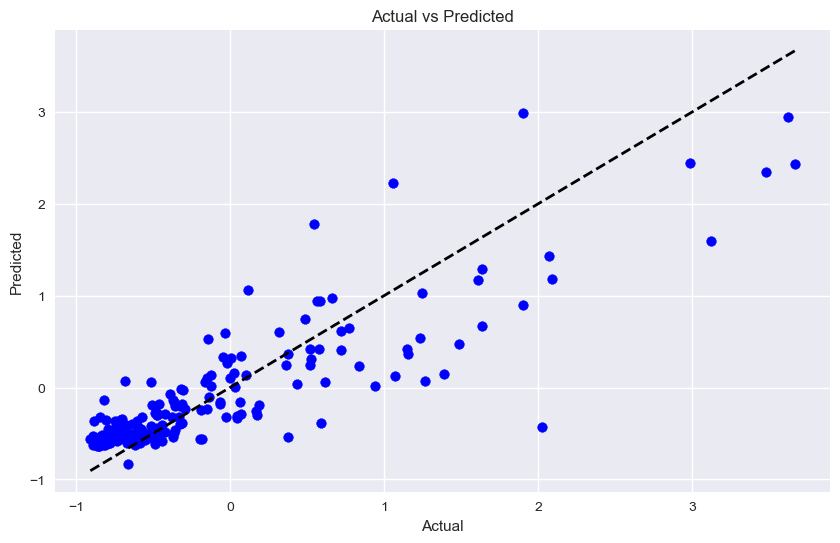

In [156]:
# Visualize predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

Hyperparameter Tuning using Grid Search Cross-validation


In [157]:
# number of features in X_train
len(X_train.columns)

21

In [158]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 22))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21]}],
             return_train_score=True, scoring='r2', verbose=1)

In [159]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.047136,0.005077,0.006189,0.004330,1,{'n_features_to_select': 1},0.698913,0.477357,0.534524,0.654151,...,0.596477,0.080358,21,0.587780,0.649219,0.632187,0.612339,0.620516,0.620408,0.020487
1,0.042453,0.006360,0.002821,0.000732,2,{'n_features_to_select': 2},0.796439,0.634903,0.621647,0.750459,...,0.695908,0.067396,20,0.679241,0.729283,0.725690,0.704376,0.722607,0.712240,0.018599
2,0.030744,0.006174,0.002428,0.000755,3,{'n_features_to_select': 3},0.804790,0.637572,0.616544,0.753932,...,0.698319,0.070977,19,0.686125,0.732283,0.729887,0.712329,0.731432,0.718411,0.017737
3,0.026128,0.001681,0.001787,0.000730,4,{'n_features_to_select': 4},0.816038,0.661637,0.657811,0.766271,...,0.721216,0.061443,13,0.705298,0.753845,0.748594,0.730891,0.746567,0.737039,0.017618
4,0.025152,0.004854,0.002335,0.000634,5,{'n_features_to_select': 5},0.818499,0.658489,0.662622,0.775555,...,0.723944,0.063285,1,0.711680,0.760808,0.753904,0.735308,0.751911,0.742722,0.017636
5,0.022247,0.002578,0.002308,0.000390,6,{'n_features_to_select': 6},0.822689,0.653223,0.656583,0.773343,...,0.723800,0.066100,2,0.715413,0.763337,0.754812,0.736240,0.754371,0.744835,0.017160
6,0.027649,0.008411,0.003002,0.000634,7,{'n_features_to_select': 7},0.823010,0.647976,0.653937,0.769802,...,0.722138,0.067285,4,0.717270,0.767319,0.759489,0.738256,0.756316,0.747730,0.017963
7,0.022929,0.005297,0.002451,0.000843,8,{'n_features_to_select': 8},0.822888,0.646102,0.655266,0.758639,...,0.720106,0.065933,16,0.717679,0.768171,0.761010,0.740377,0.757295,0.748906,0.018088
8,0.020794,0.002443,0.002268,0.000535,9,{'n_features_to_select': 9},0.823643,0.645212,0.655266,0.756938,...,0.719738,0.066174,17,0.717927,0.768879,0.761010,0.741021,0.757680,0.749303,0.018130
9,0.017504,0.002697,0.002751,0.000669,10,{'n_features_to_select': 10},0.825866,0.644367,0.655406,0.750626,...,0.718783,0.066387,18,0.718213,0.769236,0.761275,0.743491,0.758010,0.750045,0.017967


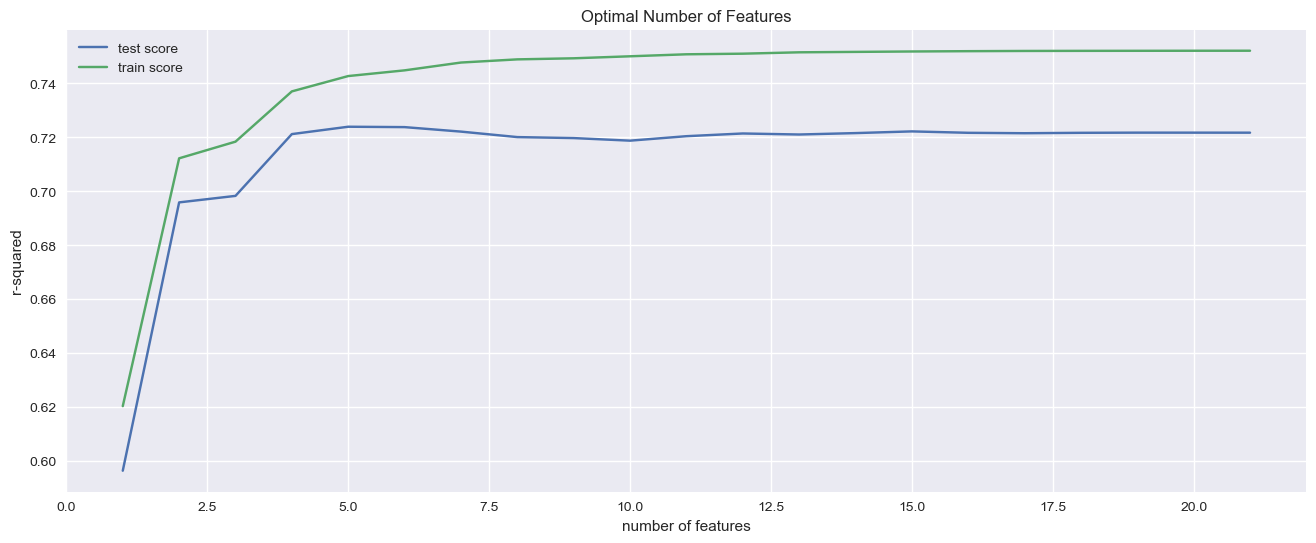

In [160]:
# plotting cv results to help us choose the optimal value of number of features and build a final model
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [161]:
import sklearn

# final model
n_features_optimal = 5

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.7321329042402582


In [ ]:
#Notice that the test score is very close to the 'mean test score' on the k-folds (about 72%). In general, the mean score estimated by CV will usually be a good estimate of the test score.

Making predictions

In [162]:
X_train.head()

,mode_Major,mode_Minor,released_season_Spring,released_season_Summer,released_season_Winter,artist_count,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,...,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
318,1.0,0.0,1.0,0.0,0.0,-0.623526,-0.389321,-0.154406,-0.357148,0.712157,...,-0.442275,-0.280574,-0.091021,0.411373,0.536619,1.252330,-0.079990,-0.188234,3.120501,-0.720335
545,0.0,1.0,1.0,0.0,0.0,0.496468,-0.621934,-0.205499,-0.692699,0.514538,...,-0.276574,-0.363331,0.372357,0.753286,1.644502,1.191907,0.150886,-0.188234,-0.817894,-0.619429
557,1.0,0.0,0.0,1.0,0.0,0.496468,-0.623706,-0.563151,-0.773694,-0.631656,...,-0.442275,-0.363331,-1.481154,-0.545984,-1.082594,-0.258260,0.728077,-0.069323,0.494904,0.288728
109,1.0,0.0,0.0,1.0,0.0,-0.623526,-0.320943,-0.512058,-0.345578,4.229787,...,-0.442275,0.527896,0.265424,-1.366575,0.195732,1.554449,-1.041975,-0.188234,-0.599095,-0.619429
77,0.0,1.0,0.0,0.0,1.0,0.496468,-0.200648,1.327293,-0.241441,0.435490,...,1.877534,0.865289,1.619913,0.753286,0.280954,0.527247,-0.849578,-0.188234,-0.599095,-0.316710


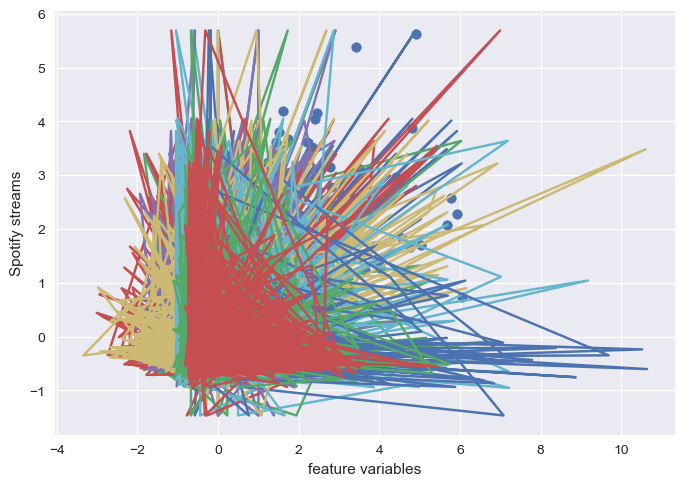

In [163]:
train_predictions = lm.predict(X_train)
plt.scatter(X_train["in_spotify_playlists"], y_train)
plt.plot(X_train, train_predictions)
plt.ylabel("Spotify streams")
plt.xlabel("feature variables")
plt.show()

In [ ]:
#vals_to_predict = pd.DataFrame({'feat1': [1, 2, 3],
                               'feat2:' [1, 2, 3],
                               'feat3' [1, 2, 3],
                               'etc': [1, 2, 3]})  # Change to use your feature variable names and sensible numbers to predict with

# The predict function uses your model that predict the outcome of the target given the new feature values
#lm.predict(vals_to_predict)

# 2. Other Machine Learning Models

In [ ]:
#Nonlinear Regression include Neural Networks, Decision Trees and random Forest, Support Vector Regression, K-Nearest Neihbors (KNN) or Polynomial regression
# Clustering